In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv("/content/sample_data/coffee_clean.csv", encoding='latin-1')


# convert date to numeric value for regression
df['review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%Y')
df['review_date'] = df['review_date'].map(dt.datetime.toordinal)

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 2199
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rating                      1891 non-null   int64  
 1   roaster                     1891 non-null   object 
 2   name                        1891 non-null   object 
 3   region_africa_arabia        1891 non-null   int64  
 4   region_caribbean            1891 non-null   int64  
 5   region_central_america      1891 non-null   int64  
 6   region_hawaii               1891 non-null   int64  
 7   region_asia_pacific         1891 non-null   int64  
 8   region_south_america        1891 non-null   int64  
 9   type_espresso               1891 non-null   int64  
 10  type_organic                1891 non-null   int64  
 11  type_fair_trade             1891 non-null   int64  
 12  type_decaffeinated          1891 non-null   int64  
 13  type_best_value             1891 

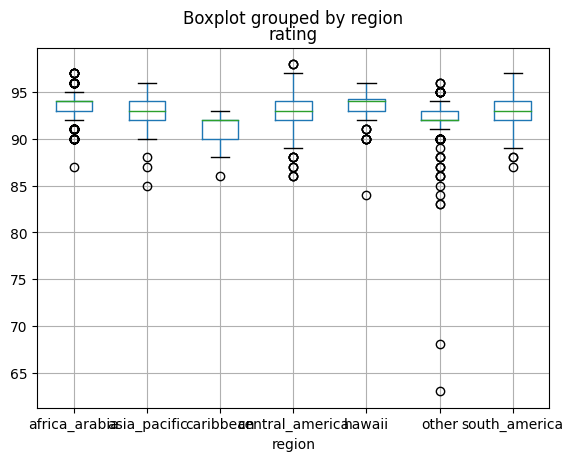

In [15]:
# 'region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'region_south_america'
boxplot = df.boxplot(by = 'region', column=['rating'])

In [27]:
from sklearn.model_selection import train_test_split




# split data frame into features and targets
df_target = df['rating']
df_features = df.drop(columns=['rating', 'roaster', 'name', 'roast', 'region'])

# create test and train sets
X = df_features
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Lasso score on test data: ", lasso.score(X_test, y_test))

Lasso score on test data:  -0.002587486852559495
